In [1]:
# pip install matplotlib==3.9.0 opencv-python==4.10.0.82

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
IMAGE_FOLDER_PATH = 'data/brain_tumor_dataset/train/'

In [4]:
df = pd.read_csv('data/brain_tumor_dataset/brain_multi.csv')
df

,image_name,label,xmin,ymin,xmax,ymax,confidence
0,Cancer-1433-_jpg.rf.ffd0a1f62cf36b33c1b30ca730...,tumor,372,217,577,378,0.851654
1,y481_jpg.rf.60fe5ab89bc023cf04056a12ad6c1986.jpg,tumor,116,219,482,583,0.369798
2,y389_jpg.rf.b8544adf8df67c0d673c5767736e21ed.jpg,tumor,409,105,584,258,0.604411
3,y186_jpg.rf.abe7c3992881b11f9e1bcd9f45d6b0b6.jpg,tumor,317,302,453,402,0.407725
4,y307_jpg.rf.33a3be561c620afaea96210172ef1c02.jpg,tumor,233,67,497,283,0.617328
...,...,...,...,...,...,...,...
5865,y20_jpg.rf.dc36e72b429beeea948f67af926e112c.jpg,tumor,196,411,279,541,0.023799
5866,Not-Cancer-2054-_jpg.rf.945e03181d798620912f14...,normal,0,0,640,640,0.111899
5867,Cancer-174-_jpg.rf.fc440e0e52f00cd1d95655a44c4...,tumor,280,259,357,340,0.640109
5868,y238_jpg.rf.50001e02ae47a72a25e9ecea763a99e4.jpg,tumor,330,395,436,492,0.605003


In [5]:
tumor_df = df[df.label == 'tumor']
tumor_df

,image_name,label,xmin,ymin,xmax,ymax,confidence
0,Cancer-1433-_jpg.rf.ffd0a1f62cf36b33c1b30ca730...,tumor,372,217,577,378,0.851654
1,y481_jpg.rf.60fe5ab89bc023cf04056a12ad6c1986.jpg,tumor,116,219,482,583,0.369798
2,y389_jpg.rf.b8544adf8df67c0d673c5767736e21ed.jpg,tumor,409,105,584,258,0.604411
3,y186_jpg.rf.abe7c3992881b11f9e1bcd9f45d6b0b6.jpg,tumor,317,302,453,402,0.407725
4,y307_jpg.rf.33a3be561c620afaea96210172ef1c02.jpg,tumor,233,67,497,283,0.617328
...,...,...,...,...,...,...,...
5861,y412_jpg.rf.bc86d16bb6bcc3e1fb8e54b237d1f30e.jpg,tumor,233,321,478,497,0.190697
5862,y196_jpg.rf.71e86f8bcb2c32588a250ae8791bf99a.jpg,tumor,303,164,523,376,0.808000
5865,y20_jpg.rf.dc36e72b429beeea948f67af926e112c.jpg,tumor,196,411,279,541,0.023799
5867,Cancer-174-_jpg.rf.fc440e0e52f00cd1d95655a44c4...,tumor,280,259,357,340,0.640109


In [6]:
def show_bbox(tumor_df, index=-1, image_name=''):
    if image_name == '' and index == -1:
        raise

    if image_name == '':
        image_path = os.path.join(IMAGE_FOLDER_PATH, tumor_df.iloc[index].image_name)
        bbox = tumor_df.iloc[index][['xmin', 'ymin', 'xmax', 'ymax']]

    if index == -1:
        image_path = os.path.join(IMAGE_FOLDER_PATH, image_name)
        bbox = tumor_df.loc[tumor_df.image_name == image_name, ['xmin', 'ymin', 'xmax', 'ymax']].squeeze()

    image = cv2.imread(image_path)
    image = cv2.rectangle(
        img=image,
        pt1=(bbox['xmin'], bbox['ymin']),
        pt2=(bbox['xmax'], bbox['ymax']),
        color=(255, 0, 0),
        thickness=2
    )
    plt.imshow(image)
    plt.show()

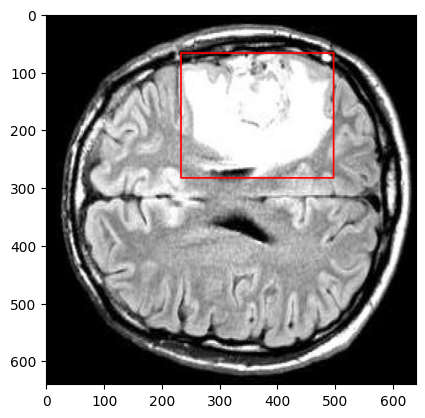

In [7]:
show_bbox(tumor_df, index=4)

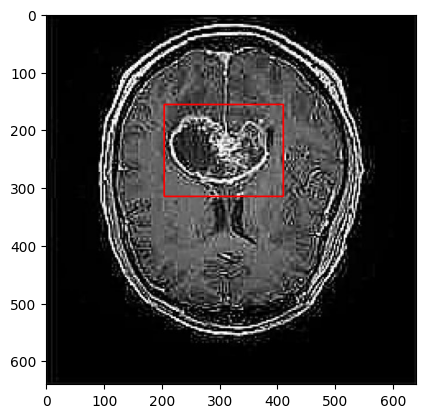

In [8]:
show_bbox(tumor_df, image_name='Cancer-1906-_jpg.rf.4ae89773088a21310993ac40037e9799.jpg')